# Miscellaneous
- Vedo se conviene guardare la variazione di modulo o fase x capire se il qubit è stato eccitato
- Guardo quanto si sposta la risonanza (lo guardo dal MODULO di S21) con il drive (misure di ultimo giorno)
- Guardo quanto si sposta la risonanza |0> nel tempo: da confrontare x ordini di grandezza con punto precedente

In [1]:
from h5py import *
import numpy as np
from h5utils import *
import matplotlib.pyplot as plt

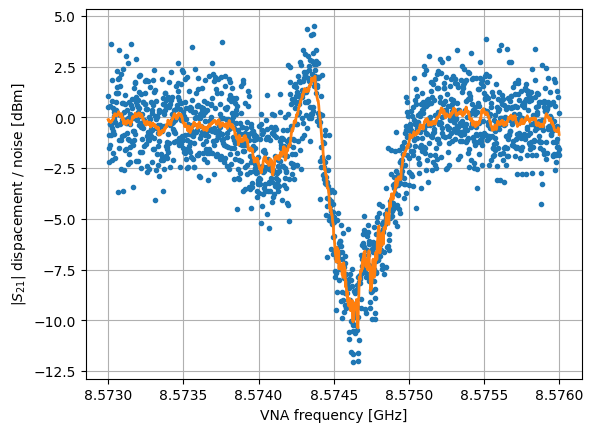

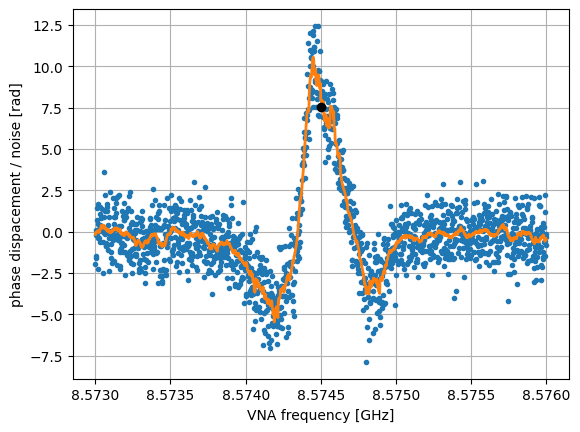

In [47]:
"""CHECK WHETER PHASE OR MAG IS BETTER FOR DISTINCTION of |0> and |1>"""
freq, I, Q = getDatasetValue(filename,"/",1)
freq, Id, Qd = getDatasetValue(filename,"/",0)

def loc_std(x,y,f,fspan):
    # Returns std over the frequencies [f+-fspan/2]
    i_min, i_max = fspan_to_ispan(x,f-fspan/2,f+fspan/2)
    return np.std(y[i_min:i_max])
def loc_ave(x,y,f,fspan):
    # Returns std over the frequencies [f+-fspan/2]
    i_min, i_max = fspan_to_ispan(x,f-fspan/2,f+fspan/2)
    return np.mean(y[i_min:i_max])
def loc_noise(x,y,fspan):
    # Returns std over the frequencies [f+-fspan/2]
    noise = np.zeros(len(x))
    for i in np.arange(0,len(x)):
        noise[i] = loc_std(x,y,x[i],fspan)
    return noise
def loc_smooth(x,y,fspan):
    # Returns std over the frequencies [f+-fspan/2]
    smooth = np.zeros(len(x))
    for i in np.arange(0,len(x)):
        smooth[i] = loc_ave(x,y,x[i],fspan)
    return smooth

S21dB = 20*np.log10(np.sqrt(np.multiply(I,I)+np.multiply(Q,Q)))
phase = np.arctan2(I,Q)
S21dBd = 20*np.log10(np.sqrt(np.multiply(Id,Id)+np.multiply(Qd,Qd)))
phased = np.arctan2(Id,Qd)

fspan = 0.06e6
S21dBnoise = loc_noise(freq, S21dB, fspan)
phasenoise = loc_noise(freq, phase, fspan)

f, ax = plt.subplots()
ax.plot(freq/1e9,(S21dB-S21dBd)/S21dBnoise,'.')
ax.plot(freq/1e9,loc_smooth(freq,S21dB-S21dBd,fspan)/S21dBnoise,linewidth=2)
ax.set_xlabel("VNA frequency [GHz]")
ax.set_ylabel("$|S_{21}|$ dispacement / noise [dBm]")
ax.grid()
fphase, ax = plt.subplots()
ax.plot(freq/1e9,(phase-phased)/phasenoise,'.')
ax.plot(freq/1e9,loc_smooth(freq,phase-phased,fspan)/phasenoise,linewidth=2)
ax.set_xlabel("VNA frequency [GHz]")
ax.set_ylabel("phase dispacement / noise [rad]")
# Plot the selected point for measurements
i1, i2 = fspan_to_ispan(freq,8.5745e9,8.5745e9)
ax.plot(freq[i1]/1e9,(phase[i1]-phased[i1])/phasenoise[i1],'o',color='black')
ax.grid()

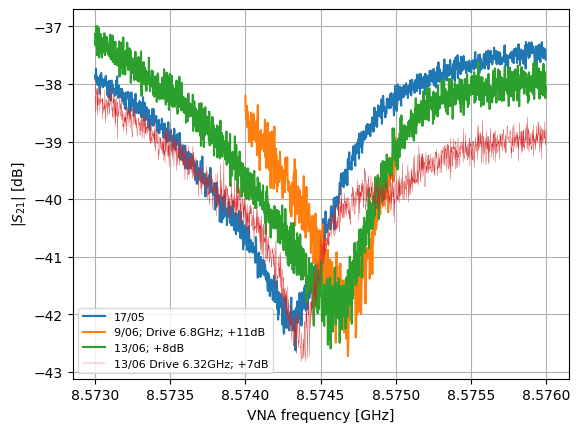

In [53]:
"""SPOSTAMENTO RISONANZA SENZA DRIVE"""
freq, prima = getDatasetValue("../INTERESSANTI/misura_due_risonanze_17_05_30Hz.h5", "/Paramp_OFF_stretto/-25dBm/", 0)
freq2, I2, Q2 = getDatasetValue("../INTERESSANTI/13_06_discriminant_freq.h5", "/", 1)
freq3, I3, Q3 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 490)
S21dB2 = 20*np.log10(np.sqrt(np.multiply(I2,I2)+np.multiply(Q2,Q2)))
S21dB3 = 20*np.log10(np.sqrt(np.multiply(I3,I3)+np.multiply(Q3,Q3)))
fig, ax = plt.subplots()
i1, i2 = fspan_to_ispan(freq, freq2[0], freq2[-1])
ax.plot(freq[i1:i2]/1e9, prima[i1:i2], label = "17/05")
ax.plot(freq3/1e9, S21dB3+11, label= "9/06; Drive 6.8GHz; +11dB")
ax.plot(freq2/1e9, S21dB2+8, label= "13/06; +8dB")
#ax.set_title("Drive OFF; $P_{VNA}$ = -25 dB")
ax.set_xlabel("VNA frequency [GHz]")
ax.set_ylabel("$|S_{21}|$ [dB]")


freq4, I4, Q4 = getDatasetValue("../INTERESSANTI/13_06_discriminant_freq.h5", "/", 0)
S21dB4 = 20*np.log10(np.sqrt(np.multiply(I4,I4)+np.multiply(Q4,Q4)))
ax.plot(freq4/1e9, S21dB4+7, label= "13/06 Drive 6.32GHz; +7dB", linewidth = 0.25)
# freq5, S21dB5 = getDatasetValue("../INTERESSANTI/Lamb_shift_search_long_16_05.h5", "/pow_83/", 0)
# i1, i2 = fspan_to_ispan(freq5, freq2[0], freq2[-1])
# #S21dB5 = 20*np.log10(np.sqrt(np.multiply(I5,I5)+np.multiply(Q5,Q5)))
# ax.plot(freq5[i1:i2]/1e9, S21dB5[i1:i2], label= "aaa", linewidth = 0.2)

ax.legend(loc="lower left", fontsize = 8)
ax.grid()

0.16875


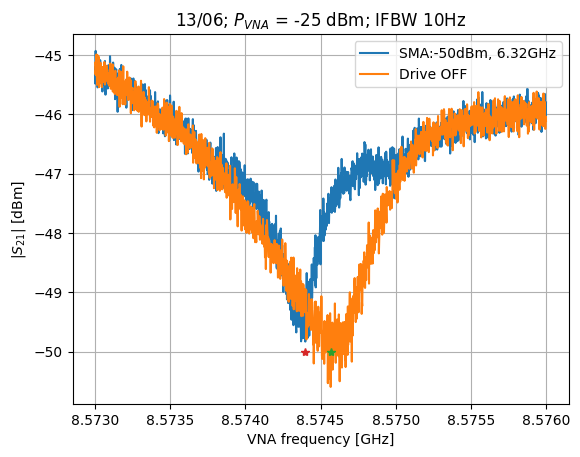

In [17]:
"""DISTANZA RISONANZA DRIVE OFF E DRIVE ON 6.32GHz, ultimo giorno 13/06"""
freq2, I1, Q1 = getDatasetValue("../INTERESSANTI/13_06_discriminant_freq.h5", "/", 1)
freq2, I2, Q2 = getDatasetValue("../INTERESSANTI/13_06_discriminant_freq.h5", "/", 0)
S21dB1 = 20*np.log10(np.sqrt(np.multiply(I1,I1)+np.multiply(Q1,Q1)))
S21dB2 = 20*np.log10(np.sqrt(np.multiply(I2,I2)+np.multiply(Q2,Q2)))
fig, ax = plt.subplots()
ax.plot(freq2/1e9, S21dB2, label= "SMA:-50dBm, 6.32GHz")
ax.plot(freq2/1e9, S21dB1, label= "Drive OFF")
ax.set_title("13/06; $P_{VNA}$ = -25 dBm; IFBW 10Hz")
ax.set_xlabel("VNA frequency [GHz]")
ax.set_ylabel("$|S_{21}|$ [dBm]")
ax.legend()
ax.grid()

print((freq2[np.argmin(S21dB1)]-freq2[np.argmin(S21dB2)])/1e6)
ax.plot(freq2[np.argmin(S21dB1)]/1e9, -50,'*')
ax.plot(freq2[np.argmin(S21dB2)]/1e9, -50,'*')

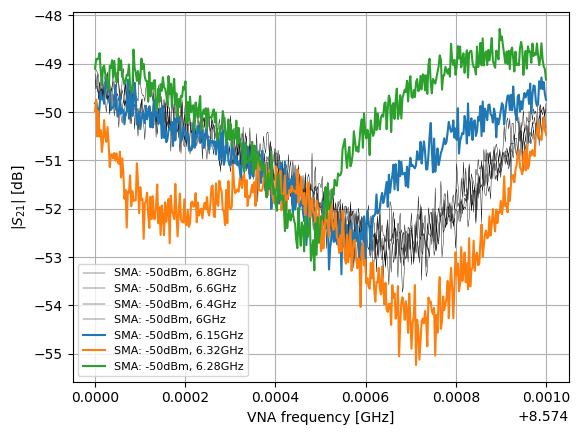

In [77]:
"""9/06 SPOSTAMENTO DELLA RISONANZA IN CORRISPONDENZA DEI 3 PICCHI"""
freq, I1, Q1 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 970)
freq, I2, Q2 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 490)
freq, I3, Q3 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 891)
freq, I4, Q4 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 100)
freq, I5, Q5 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 1146)
freq, I6, Q6 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 0)
freq, I7, Q7 = getDatasetValue("../INTERESSANTI/measure_exitation_9_06_VNA-20dBm_1MHzVNARange (1).h5", "/SMA_power-50dBm/", 634)
S21dB1 = 20*np.log10(np.sqrt(np.multiply(I1,I1)+np.multiply(Q1,Q1)))
S21dB2 = 20*np.log10(np.sqrt(np.multiply(I2,I2)+np.multiply(Q2,Q2)))
S21dB3 = 20*np.log10(np.sqrt(np.multiply(I3,I3)+np.multiply(Q3,Q3)))
S21dB4 = 20*np.log10(np.sqrt(np.multiply(I4,I4)+np.multiply(Q4,Q4)))
S21dB5 = 20*np.log10(np.sqrt(np.multiply(I5,I5)+np.multiply(Q5,Q5)))
S21dB6 = 20*np.log10(np.sqrt(np.multiply(I6,I6)+np.multiply(Q6,Q6)))
S21dB7 = 20*np.log10(np.sqrt(np.multiply(I7,I7)+np.multiply(Q7,Q7)))
fig, ax = plt.subplots()
ax.plot(freq/1e9, S21dB2, label= "SMA: -50dBm, 6.8GHz", linewidth = 0.3, color = "black")
ax.plot(freq/1e9, S21dB4, label= "SMA: -50dBm, 6.6GHz", linewidth = 0.3, color = "black")
ax.plot(freq/1e9, S21dB5, label= "SMA: -50dBm, 6.4GHz", linewidth = 0.3, color = "black")
ax.plot(freq/1e9, S21dB6, label= "SMA: -50dBm, 6GHz", linewidth = 0.3, color = "black")
ax.plot(freq/1e9, S21dB7, label= "SMA: -50dBm, 6.15GHz")
ax.plot(freq/1e9, S21dB1, label= "SMA: -50dBm, 6.32GHz")
ax.plot(freq/1e9, S21dB3, label= "SMA: -50dBm, 6.28GHz")
#ax.set_title("9/06; $P_{VNA}$ = -20 dBm; IFBW 30Hz;\nThe 'Drive OFF' measure is not avaible\n For (many sampled) intermediate Drive frequencies in [6.32,6.8]GHz\nthe resonance monotonically shifts to higher frequencies")
ax.set_xlabel("VNA frequency [GHz]")
ax.set_ylabel("$|S_{21}|$ [dB]")
#ax.set_xlim([8.573,8.576])
ax.legend(loc="lower left", fontsize = 8)
ax.grid()